In [10]:
from turtle import color
from mpl_toolkits import mplot3d
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt



from shapely.geometry import LineString, Polygon, MultiPolygon, Point
pts = [(0,25,15),
        (0,20,15),
        (10,15,15),
        (15,20,15),
        (15,25,15)
        ]
nofly = Polygon(pts)
def faces_from_poly(polygon):
    # ToDo
    # check not empty
    # check 3D
    # init list;
    polygons = [polygon]
    coords = polygon.exterior.coords
    for pt in range(len(coords) - 1):
        poly = [coords[pt], coords[pt + 1]]
        polybase = [(tpl[0],tpl[1],0) for tpl in poly]
        polybase.reverse()
        poly.extend(polybase)
        polygons.append(Polygon(poly))

    return polygons


x = np.linspace(-4*np.pi,4*np.pi,100)
y = 2*x + np.cos(x)
#y = 2*np.sin(x) + np.sin(4*x) + 3*np.cos(x) + np.sin(2*x) + np.sin(x**2) - np.cos(6*x)
z = np.sin(x) + np.sin(4*x)
line = LineString([(xc,yc,zc) for xc, yc, zc in zip(x,y,z)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x,y,z)

polys = faces_from_poly(nofly)
for poly in polys:
    X = [tpl[0] for tpl in poly.exterior.coords]
    Y = [tpl[1] for tpl in poly.exterior.coords]
    Z = [tpl[2] for tpl in poly.exterior.coords]
    if poly.intersects(line):
        ax.plot(X, Y, Z, color='red')
    else:
        #ax.plot(X, Y, Z, color='grey')
        pass
    
        

plt.show()




<IPython.core.display.Javascript object>

In [11]:
START = Point(-5, 0)
END = Point(20, 15)

plt.plot(START, END)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


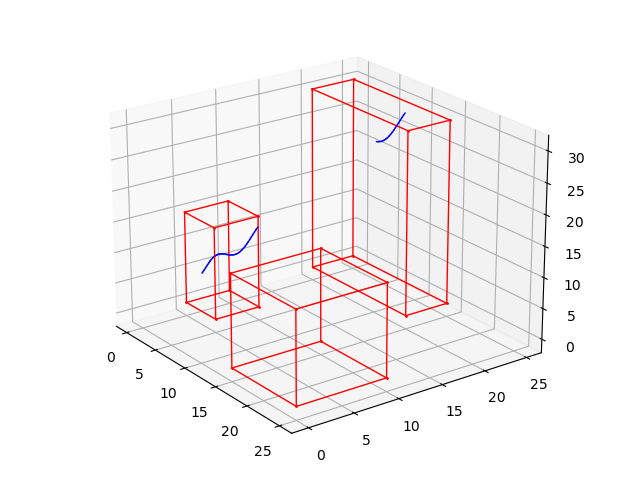

In [41]:
from Geometry3D import *

# a wrapper to generate boxes, given 6 extent values
def cuboid(ext):
    xmin, xmax, ymin, ymax, zmin, zmax = ext
    a = Point(xmax,ymax,zmax)
    b = Point(xmin,ymax,zmax)
    c = Point(xmin,ymin,zmax)
    d = Point(xmax,ymin,zmax)
    e = Point(xmax,ymax,zmin)
    f = Point(xmin,ymax,zmin)
    g = Point(xmin,ymin,zmin)
    h = Point(xmax,ymin,zmin)
    cpg0 = ConvexPolygon((a,d,h,e))
    cpg1 = ConvexPolygon((a,e,f,b))
    cpg2 = ConvexPolygon((c,b,f,g))
    cpg3 = ConvexPolygon((c,g,h,d))
    cpg4 = ConvexPolygon((a,b,c,d))
    cpg5 = ConvexPolygon((e,h,g,f))
    return ConvexPolyhedron((cpg0,cpg1,cpg2,cpg3,cpg4,cpg5))

def prism(corners):
    pass
    # here have to draw some non-parallelepiped geoms

'''
building = ConvexPolygon((
    Point(0,10,0),
    Point(5,10,0),
    Point(5,5,0),
    Point(0,5,0),
    Point(0,10,15),
    Point(5,10,15),
    Point(5,5,15),
    Point(0,5,15)
        ))

military = ConvexPolygon((
    Point(15,10,0),
    Point(25,10,0),
    Point(25,0,0),
    Point(15,10,10),
    Point(25,10,15),
    Point(25,0,10)
    ))

nofly = ConvexPolygon((
    Point(0,25,0),
    Point(15,25,0),
    Point(15,20,0),
    Point(0,20,0),
    Point(0,25,30),
    Point(15,25,30),
    Point(15,20,30),
    Point(0,20,30)
    ))
'''
x = np.linspace(-4*np.pi,4*np.pi,500)
#x = np.linspace(0,8*np.pi,1000)
y = 2*x + np.cos(x)
z = np.sin(x) + np.sin(4*x) + 0.9*x + 0.9*y

def get_segments(x,y,z):
    segments = []
    for pt in range(len(x)-1):
        segments.append(Segment(Point(x[pt],y[pt],z[pt]),Point(x[pt+1],y[pt+1],z[pt+1])))
    return segments

#line = Segment(Point(1,2,3),Point(15,25,1))

building = cuboid((0,5,5,10,0,15))
military = cuboid((15,25,0,10,0,15))
nofly = cuboid((0,15,20,25,0,30))
r = Renderer()
r.add((building,'r',1),normal_length = 0)
r.add((military,'r',1),normal_length = 0)
r.add((nofly,'r',1),normal_length = 0)
segments = get_segments(x,y,z)
for seg in segments:
    for barrier in [building,military,nofly]:
        if intersection(seg,barrier) is not None:
            r.add((seg,'b',1))
        else:
            pass
            #r.add((seg,'y',1))
r.show()



In [37]:
inter = 0
for seg in segments:
    if intersection(seg,building) is not None:
        inter += 1
inter

761

In [24]:
intersection(military,line)

In [25]:
intersection(nofly,line)

Segment(Point(11.956521739130435, 20.0, 1.434782608695652), Point(15.0, 25.0, 1.0))